In [85]:
# William Gunawan, Kenji Nakachi, Andrew Fortner, Kate Zhang

<h1> Overview </h1>

We chose the Airline Passenger Satisfaction Dataset from Kaggle (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).\
The features are described in the next section *Column Context*.\
Our goal is to predict "Customer Satisfcation" given all of the other features. 

<h2>Column Context:</h2>

*Gender:* Gender of the passengers **(Female, Male)**

*Customer Type:* The customer type **(Loyal customer, disloyal customer)**

*Age:* The actual age of the passengers **(years)**

*Type of Travel:* Purpose of the flight of the passengers **(Personal Travel, Business Travel)**

*Class:* Travel class in the plane of the passengers **(Business, Eco, Eco Plus)**

*Flight distance:* The flight distance of this journey **(miles)**

*Inflight wifi service:* Satisfaction level **(0:Not Applicable;1-5)**

*Departure/Arrival time convenient:* Satisfaction level **(0:Not Applicable;1-5)**

*Ease of Online booking:* Satisfaction level **(0:Not Applicable;1-5)**

*Gate location:* Satisfaction level **(0:Not Applicable;1-5)**

*Food and drink:* Satisfaction level **(0:Not Applicable;1-5)**

*Online boarding:* Satisfaction level **(0:Not Applicable;1-5)**

*Seat comfort:* Satisfaction level **(0:Not Applicable;1-5)**

*Inflight entertainment:* Satisfaction level **(0:Not Applicable;1-5)**

*On-board service:* Satisfaction level **(0:Not Applicable;1-5)**

*Leg room service:* Satisfaction level **(0:Not Applicable;1-5)**

*Baggage handling:* Satisfaction level **(0:Not Applicable;1-5)**

*Check-in service:* Satisfaction level **(0:Not Applicable;1-5)**

*Inflight service:* Satisfaction level **(0:Not Applicable;1-5)**

*Cleanliness:* Satisfaction level **(0:Not Applicable;1-5)**

*Departure Delay in Minutes:* Minutes delayed when departure **(Minutes)**

*Arrival Delay in Minutes:* Minutes delayed when Arrival **(Minutes)**

*Satisfaction:* Airline satisfaction level **(Satisfaction, neutral or dissatisfaction)**

In [86]:
# Import packages
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from matplotlib import pyplot

In [87]:
# Download data
data = pd.read_csv("https://raw.githubusercontent.com/katezhang1234/ML_Airline_Project/main/train.csv")
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h1> Step 1: Data Cleaning </h1>
<h3> 1.1: Remove Unnecessary Columns </h3>

We don't want to use features like *ID* in our classification, so we drop these unnecessary features

In [88]:
# Check for duplicated rows
print("Duplicated IDs: ",data['id'].duplicated().sum())

# Drop id and Unnamed columns -- we do not want to use these as features
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(5)

Duplicated IDs:  0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h3> 1.2: Encoding Categorical Values </h3>

In order to impute missing values, we need to encode our categorical values into numerical values

In [89]:
# One hot encoding of categorical variables
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

df_encoded = pd.get_dummies(data, columns=categorical_variables)
df_encoded.drop(['Gender_Female', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied'], axis=1, inplace=True)

labels = df_encoded['satisfaction_satisfied']
df_encoded.drop(['satisfaction_satisfied'], axis=1, inplace=True)

# Print the first five rows of the encoded DataFrame
df_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,18.0,1,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,6.0,1,0,0,1
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,0,1,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0,1,0,1
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1,1,0,1


In [90]:
# Check for missing values
nan_count = df_encoded.isna().sum().sum()
arrival_nan = df_encoded['Arrival Delay in Minutes'].isna().sum()
print("Training set missing values = ", nan_count)
print("Arrival column missing values = ", arrival_nan)
df_encoded[df_encoded.isna().any(axis=1)]

Training set missing values =  310
Arrival column missing values =  310


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
213,38,109,5,3,3,3,5,5,5,5,...,4,1,1,5,31,NaN,0,1,0,0
1124,53,1012,3,2,3,4,4,3,4,4,...,4,3,3,4,38,NaN,1,1,1,0
1529,39,733,2,5,5,5,2,4,3,2,...,2,2,2,3,11,NaN,1,1,0,1
2004,26,1035,3,3,3,1,2,3,2,2,...,4,5,5,2,41,NaN,0,0,0,1
2108,24,417,2,1,2,2,5,2,5,5,...,2,1,2,5,1,NaN,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,49,1249,2,5,2,3,2,3,3,3,...,4,3,4,3,230,NaN,1,1,1,0
102384,58,733,3,3,3,3,3,3,3,3,...,2,4,2,3,55,NaN,1,1,0,0
102552,29,1107,2,1,1,1,5,1,3,5,...,5,5,3,5,0,NaN,0,0,0,0
102960,58,1088,4,4,1,1,5,4,5,5,...,5,5,3,5,0,NaN,1,1,0,0


In [91]:
# Check for invalid satisfaction scores (not 0-5)
features = df_encoded.columns.tolist()
satisfy_features = features[2:16]
invalid_5 = (df_encoded[satisfy_features] > 5).any(axis = 1)
invalid_0 = (df_encoded[satisfy_features] < 0).any(axis = 1)

print("Records with any satisfaction score > 5: ", invalid_5.values.sum())
print(invalid_5.value_counts(), "\n")
print("Records with any satisfaction score < 0: ", invalid_0.values.sum())
print(invalid_0.value_counts())

Records with any satisfaction score > 5:  0
False    103904
dtype: int64 

Records with any satisfaction score < 0:  0
False    103904
dtype: int64


<h3>1.3 Split Into Test & Train Sets & Impute Missing Data</h3>

In [92]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size=0.2, random_state=42)

# Impute Arrival Delay in Minutes column with mean
# We're only doing this column since this is the only column with NaN values (seen from above)
mean_value_train = X_train['Arrival Delay in Minutes'].mean()
X_train['Arrival Delay in Minutes'].fillna(value=mean_value_train, inplace=True)
nan_count_train = X_train.isna().sum().sum()
print("Training Set Missing values = ", nan_count_train)

mean_value_test = X_test['Arrival Delay in Minutes'].mean()
X_test['Arrival Delay in Minutes'].fillna(value=mean_value_test, inplace=True)
nan_count_test = X_test.isna().sum().sum()
print("Test Set Missing values = ", nan_count_test)

Training Set Missing values =  0
Test Set Missing values =  0


<h2>Step 2: Data Exploration</h2>

In [93]:
# Data Exploration
combined_train_df = X_train.join(y_train)
sorted_correlations = combined_train_df.corr()['satisfaction_satisfied'].sort_values()
print(sorted_correlations)

# Can correlation be used if the label is categorical?

Type of Travel_Personal Travel      -0.449025
Arrival Delay in Minutes            -0.058794
Departure Delay in Minutes          -0.051657
Departure/Arrival time convenient   -0.050427
Gate location                        0.000248
Gender_Male                          0.012337
Age                                  0.136607
Ease of Online booking               0.170423
Customer Type_Loyal Customer         0.186588
Food and drink                       0.209592
Checkin service                      0.235985
Inflight service                     0.243859
Baggage handling                     0.246778
Inflight wifi service                0.282104
Flight Distance                      0.299090
Cleanliness                          0.303724
Leg room service                     0.311918
On-board service                     0.322308
Seat comfort                         0.349035
Inflight entertainment               0.396520
Online boarding                      0.503269
Class_Business                    

In [94]:
# Check for class imbalance
# Output: [Count of 0s   Count of 1s]

print("Gender_Male: ", combined_train_df['Gender_Male'].value_counts().values)
print("Loyal_Customer: ", combined_train_df['Customer Type_Loyal Customer'].value_counts().values)
print("Personal_Travel: ", combined_train_df['Type of Travel_Personal Travel'].value_counts().values)
print("Class_Business: ", combined_train_df['Class_Business'].value_counts().values)
print("Label (Overall Satisfaction): ", combined_train_df['satisfaction_satisfied'].value_counts().values)

# We see class imbalances in customer type, travel type, and a slight imbalance
# in the class label (overall satisfaction). 

Gender_Male:  [42099 41024]
Loyal_Customer:  [67917 15206]
Personal_Travel:  [57274 25849]
Class_Business:  [43488 39635]
Label (Overall Satisfaction):  [47166 35957]


<AxesSubplot:xlabel='Class_Business', ylabel='satisfaction_satisfied'>

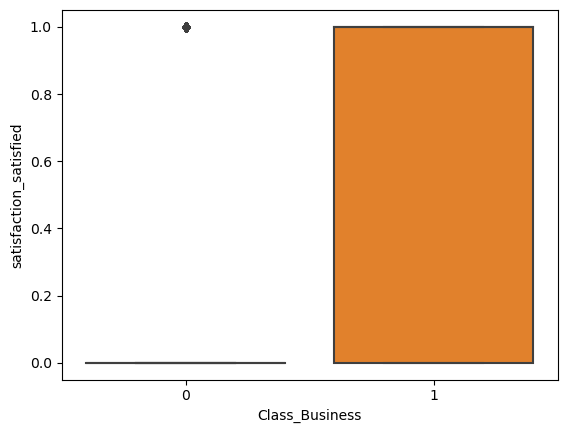

In [95]:
import seaborn as sns

sns.boxplot(x="Class_Business", y="satisfaction_satisfied", data=combined_train_df)

<AxesSubplot:xlabel='satisfaction_satisfied', ylabel='Seat comfort'>

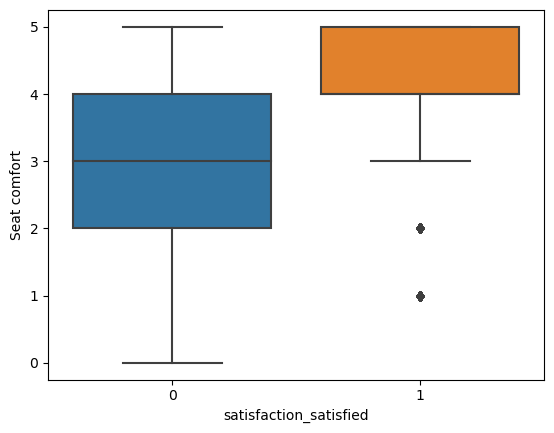

In [96]:
sns.boxplot(x="satisfaction_satisfied", y="Seat comfort", data=combined_train_df)

<AxesSubplot:xlabel='satisfaction_satisfied', ylabel='Inflight entertainment'>

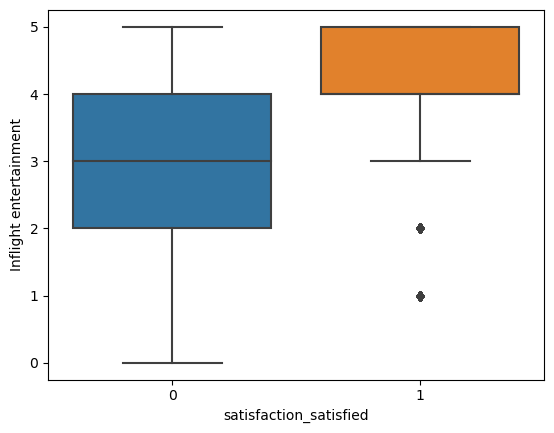

In [97]:
sns.boxplot(x="satisfaction_satisfied", y="Inflight entertainment", data=combined_train_df)

# We chose to keep all outliers/noise because flyers could've been satisifed/dissatisfied by the flight for other reasons than just
# the individual columns we are plotting.

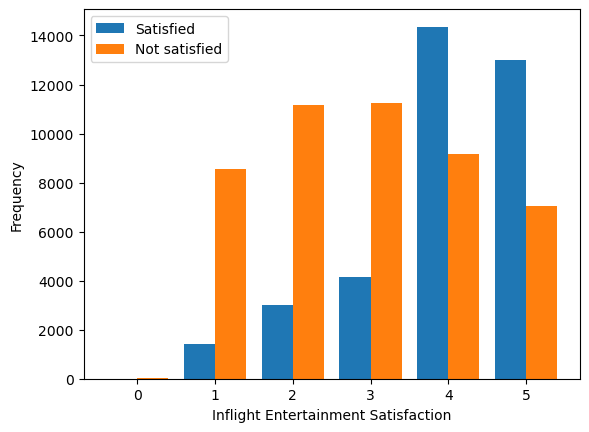

In [98]:
X_axis = np.arange(6)
entertain_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Inflight entertainment'].value_counts().sort_index().tolist()
entertain_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Inflight entertainment'].value_counts().sort_index().tolist()
entertain_good.insert(0,0)

pyplot.bar(X_axis - 0.2, entertain_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, entertain_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Inflight Entertainment Satisfaction")
pyplot.ylabel("Frequency")
pyplot.legend()

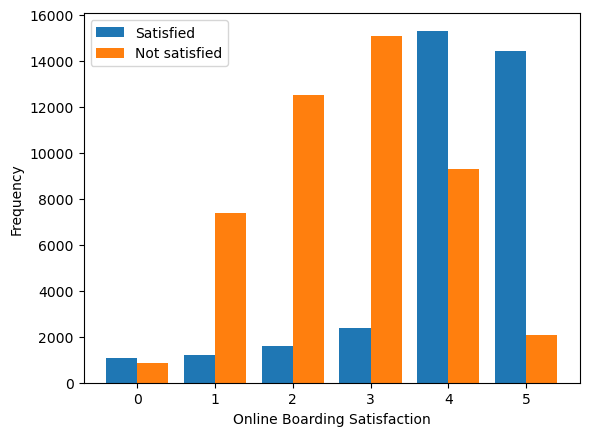

In [99]:
X_axis = np.arange(6)
boarding_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Online boarding'].value_counts().sort_index().tolist()
boarding_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Online boarding'].value_counts().sort_index().tolist()
pyplot.bar(X_axis - 0.2, boarding_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, boarding_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Online Boarding Satisfaction")
pyplot.ylabel("Frequency")
pyplot.legend()

In [100]:
continuous_df = combined_train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
pd.DataFrame.corr(continuous_df)

# Correlation of continuous variables indicates arrival and departure
# delay are highly correlated

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.101929,-0.009716,-0.011506
Flight Distance,0.101929,1.000000,0.003245,-0.001307
Departure Delay in Minutes,-0.009716,0.003245,1.000000,0.961775
Arrival Delay in Minutes,-0.011506,-0.001307,0.961775,1.000000


Correlation:  0.9617754454627355


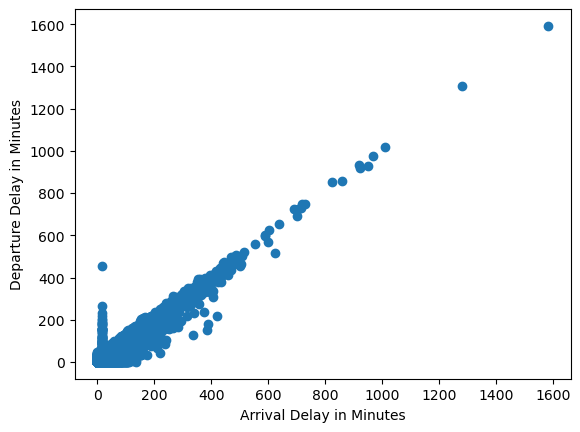

In [101]:
arrival = combined_train_df['Arrival Delay in Minutes']
departure = combined_train_df['Departure Delay in Minutes']
plt.scatter(arrival, departure)
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Departure Delay in Minutes")
print("Correlation: ", arrival.corr(departure))

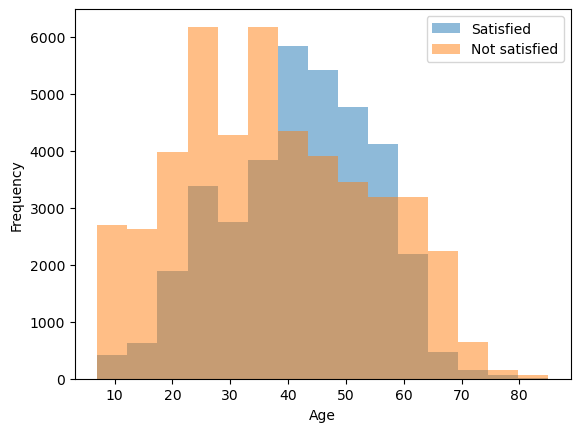

In [102]:
age_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Age']
age_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Age']

plt.hist(age_good, bins=15, alpha=0.5, label='Satisfied')
plt.hist(age_bad, bins=15, alpha=0.5, label='Not satisfied')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

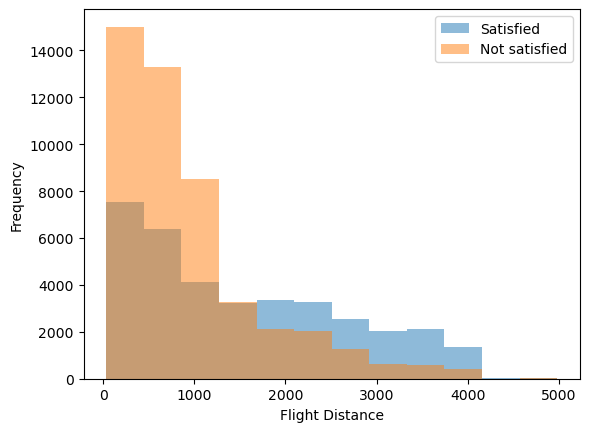

In [103]:
dist_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Flight Distance']
dist_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Flight Distance']

plt.hist(dist_good, bins=12, alpha=0.5, label='Satisfied')
plt.hist(dist_bad, bins=12, alpha=0.5, label='Not satisfied')
plt.legend(loc='upper right')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

<h2>2. Feature Engineering(?):Scaling and PCA</h2>

In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Feature Engineering
# Feature transformation, selection, creation
#       Selection: sampling to reduce dataset size?
#       Creation: aggregation

# Feature scaling: normalization/standardization
scaler = StandardScaler().fit(X_train)
scaled_train = scaler.transform(X_train)
# scaled_features_df = pd.DataFrame(scaled_data, index=leaf_data.index, columns=leaf_data.columns)
scaled_train_data = pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_train_data.head(5)
print("Means for All Columns")
print(scaled_train_data.mean())
print("\nStandard Deviations for All Columns")
print(scaled_train_data.std())


# Deal with outliers - histogram
#       Delete, impute, binning
# Dimensionality reduction

Means for All Columns
Age                                 -1.055956e-17
Flight Distance                     -5.182412e-17
Inflight wifi service                1.026345e-16
Departure/Arrival time convenient    9.376612e-16
Ease of Online booking               7.439949e-16
Gate location                        2.250631e-16
Food and drink                      -1.491892e-15
Online boarding                      4.694289e-16
Seat comfort                        -4.627134e-16
Inflight entertainment              -1.577028e-15
On-board service                     8.180768e-16
Leg room service                     3.199923e-17
Baggage handling                    -5.233380e-16
Checkin service                     -2.756473e-15
Inflight service                    -7.848013e-16
Cleanliness                          8.028298e-16
Departure Delay in Minutes           9.016029e-16
Arrival Delay in Minutes            -7.433898e-16
Gender_Male                          5.140633e-16
Customer Type_Loyal Customer

In [108]:
# We chose to reduce the dataset size as we have a lot of un-helpful features that don't have a strong correlation with the label
# satisfaction_satisfied.
pca = PCA(n_components=0.95, svd_solver='full')
fitted_pca = pca.fit(scaled_train)
transform = fitted_pca.transform(scaled_train)
pca_data = pd.DataFrame(transform)
pca_data.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.352509,-1.018291,2.148528,-0.721187,1.126820,-1.384203,1.915940,-1.148701,-0.497168,0.261655,-1.405175,1.178842,-0.030419,-1.475319,-0.199007,-0.557518,-0.308316
1,0.553699,-1.177600,-1.466487,0.640977,-1.587146,1.118624,1.789204,-0.562065,-0.174679,-0.533572,1.570320,-0.274326,-0.022819,-1.163483,1.576754,0.686011,-0.166821
2,2.035249,0.500743,-3.602130,-0.712883,0.648355,-2.440184,0.423504,-2.092385,0.048629,-0.803277,0.079284,0.702629,0.141213,-0.274990,-0.433991,-0.106228,-0.074054
3,-2.361882,-0.823809,-0.279799,-0.877883,1.418836,-1.795725,0.801231,0.787980,1.038086,-0.831110,1.133799,1.378006,-0.303940,0.259088,1.301952,0.070167,-0.248149
4,4.180752,-0.084681,-0.550150,-0.009448,-1.515521,1.460253,1.381425,0.024662,-1.856772,-0.346712,-0.474294,1.114201,-0.604865,0.254607,-0.022538,-0.442907,0.399462


In [109]:
# Scaling test data
scaled_test = scaler.transform(X_test)
scaled_test_data = pd.DataFrame(scaled_test, columns=X_test.columns)
# Transforming test data
transformed_test = fitted_pca.transform(scaled_test_data)
pca_data_test = pd.DataFrame(transformed_test)
pca_data_test.head(5)

/Users/kenjinakachi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.597025,0.445625,-0.118678,-1.206940,2.937785,0.251137,-0.179809,2.218480,0.178247,-0.185685,-0.313154,-0.287757,0.422496,0.882328,0.287146,0.378102,-0.455396
1,1.055296,-2.498477,1.327105,-0.301463,-0.645381,0.915135,-1.654860,0.613215,-0.754642,0.054397,1.054215,-1.692718,-0.856787,-0.623394,-0.546561,0.197453,0.320731
2,1.162072,1.034433,0.123359,0.146257,1.955031,-1.326219,1.050652,0.414280,0.587874,-1.355886,1.653140,-0.145615,-0.233134,0.458483,0.532250,0.050437,0.267155
3,0.692196,0.350494,0.807796,-0.564026,1.993417,0.114370,-0.242392,1.937783,1.093797,0.293771,0.920950,-0.041967,-0.651639,0.453742,0.248477,0.020762,-0.274318
4,2.179651,1.371234,0.861928,-0.184686,-1.895388,1.339432,-0.752820,-0.789753,-0.288069,-0.167562,0.450226,-0.073526,0.046337,-1.204935,1.275570,-0.503480,0.169093


<h2>3. Clustering</h2>

In [22]:
# Clustering ... this might also count as data exploration
# Look for natural patterns in the data
# Optional, if we have time

# K-means


<h3>3.1 DBScan</h3>

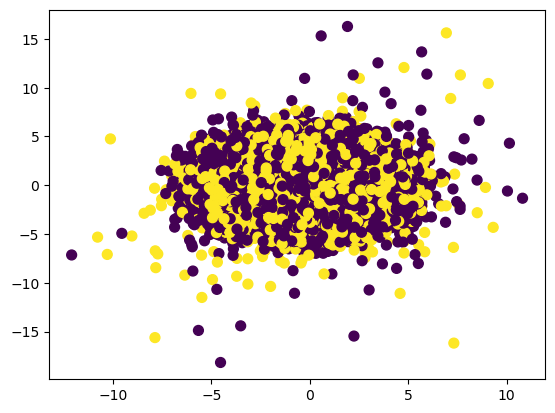

In [23]:
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.manifold import MDS

def scatter(data, labels, numPoints = 10000):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

scatter(pca_data, y_train)

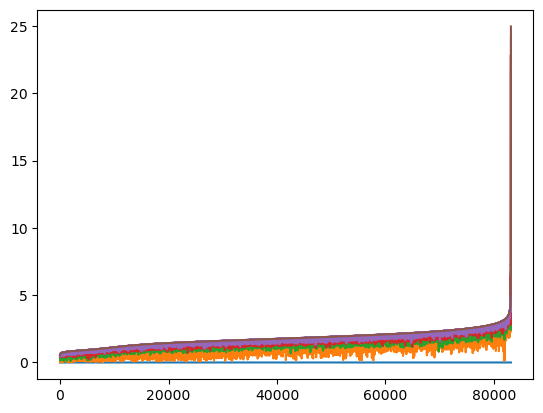

In [24]:
# Find DBScan nearest neighbors

neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(pca_data)
distances,indices = neigh.kneighbors(pca_data)

sorted_distances = sorted(distances, key=lambda x:x[5])
plt.plot(sorted_distances)
plt.show()


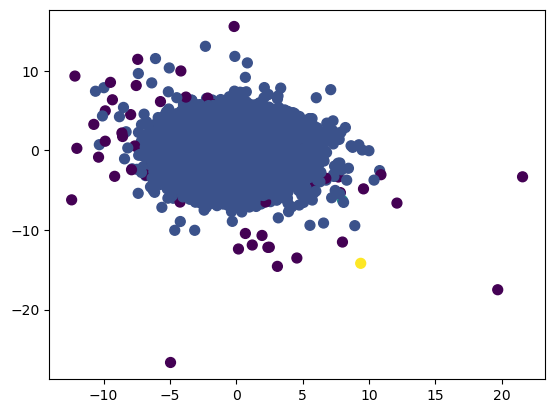

In [25]:
from sklearn.cluster import DBSCAN
# DBScan
db_scan = DBSCAN(min_samples=4, eps=3)
dbscan_labels = db_scan.fit_predict(pca_data)

labels_series = pd.Series(dbscan_labels)
scatter(pca_data, labels_series)

<h3>3.2 Hierarchial Clustering</h3>

(832, 17)
Single =  0.7329696799033115
Complete =  0.6582051856691857
Average =  0.7759370756285814
Centroid =  0.7465065951919121
Ward =  0.33447270395876133


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [242.5, 242.5, 272.5, 272.5],
  [220.0, 220.0, 257.5, 257.5],
  [205.0, 205.0, 238.75, 238.75],
  [167.5, 167.5, 221.875, 221.875],
  [111.875, 111.875, 194.6875, 194.6875],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [340.0, 340.0, 360.0, 360.0],
  [325.0, 325.0, 350.0, 350.0],
  [385.0, 385.0, 395.0, 395.0],
  

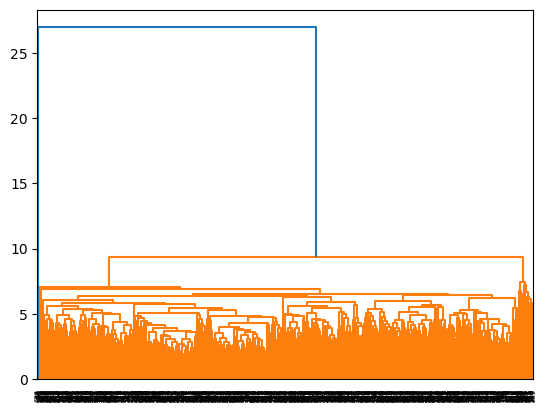

In [46]:
from sklearn.model_selection import StratifiedKFold
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist
# Hierarchical clustering

def downsample_data(data, labels):
    downData = None
    downLabels = None

    kfold = StratifiedKFold(n_splits = 100, shuffle = False)
    for throwAway_index, subsample_index in kfold.split(data, labels):
        downData = data.iloc[subsample_index]
        downLabels = labels.iloc[subsample_index]
        break
    
    print(downData.shape)
    return downData


# Downsample data for proximity matrix
sampled_dataset = downsample_data(pca_data, y_train)
# Pass the down-sampled dataset into pdist to get your proximity matrix for calculating CPCC
proximity_matrix = pdist(sampled_dataset)

# trying different hierarchial clustering methods
single = linkage(sampled_dataset, 'single')
complete = linkage(sampled_dataset, 'complete')
average = linkage(sampled_dataset, 'average')
centroid = linkage(sampled_dataset, 'centroid')
ward = linkage(sampled_dataset, 'ward')

print("Single = ", cophenet(single, pdist(sampled_dataset))[0])
print("Complete = ", cophenet(complete, pdist(sampled_dataset))[0])
print("Average = ", cophenet(average, pdist(sampled_dataset))[0])
print("Centroid = ", cophenet(centroid, pdist(sampled_dataset))[0])
print("Ward = ", cophenet(ward, pdist(sampled_dataset))[0])

### Results ###
# Single =  0.7329696799033115
# Complete =  0.6582051856691857
# Average =  0.7759370756285814
# Centroid =  0.7465065951919121
# Ward =  0.33447270395876133

dendrogram(average)

<h2> 4. Anomaly Detection </h2>

In [73]:
# Anomaly detection
from sklearn.covariance import EllipticEnvelope

outliers_fraction = 0.25
# EllipticEnvelope(contamination = outliers_fraction).fit_predict(pca_data)

<h2>5. Modeling</h2>

<h3>5.1 Regression Modeling</h3>

In [59]:
# Modeling - Regression
# Pick certain continuous features and plot against the label?

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

reg = LinearRegression()
reg.fit(pca_data, y_train)
print("slope = ", reg.coef_, "\nintercept =", reg.intercept_)

slope =  [-0.14990517  0.00896066 -0.00781036  0.02433572 -0.11534456 -0.02025386
  0.01978645 -0.0404052   0.00153417  0.02730913 -0.00496812 -0.09984916
  0.00813354  0.03483591 -0.03805748 -0.00991756  0.07992919] 
intercept = 0.4325758213731458


<h3>5.1 Regression Evaluation</h3>

In [110]:
y_test_preds = reg.predict(pca_data_test)

print("MAE = ", metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_preds))
print("MSE = ", metrics.mean_squared_error(y_true=y_test, y_pred=y_test_preds))
print("RMSE = ", metrics.mean_squared_error(y_true=y_test, y_pred=y_test_preds, squared=False))
print("R2 = ", metrics.r2_score(y_true=y_test, y_pred=y_test_preds))

MAE =  0.2599151580632687
MSE =  0.11558778101326993
RMSE =  0.3399820304270064
R2 =  0.5300353887020864


In [123]:
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(reg, pca_data, y_train, cv=5)
r2_scores_avg = sum(r2_scores) / len(r2_scores)
print(r2_scores_avg)

0.5269817129162364


<h3>5.2 Decision Tree</h3>

In [144]:
# Modeling - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


clf = DecisionTreeClassifier(criterion='entropy', max_depth=500, min_samples_leaf=20)
clf.fit(pca_data, y_train)
y_pred = clf.predict(pca_data_test)
accuracy_score(y_test, y_pred)

0.9014484384774554

In [145]:
# Check accuracy using cross validation score
accuracy = cross_val_score(clf, pca_data, y_train, cv=10)
print(np.mean(accuracy))

0.89644259423214


In [151]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth": [50,100,500] , "min_samples_leaf": [10,15,20,25], "max_features": [5,10,15,20]}

grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(pca_data, y_train)
print(grid_search.best_params_)
print("Accuracy =", grid_search.best_score_)

### Results ###
# {'max_depth': 500, 'max_features': 15, 'min_samples_leaf': 25}
# Accuracy = 0.8966592117927157

/Users/kenjinakachi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenjinakachi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenjinakachi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/kenjinakachi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_

{'max_depth': 500, 'max_features': 15, 'min_samples_leaf': 25}
Accuracy = 0.8966592117927157


In [28]:
# Modeling - KNN

In [29]:
# Evaluation